# 데이터 분석

In [4]:
import pandas as pd

# 데이터 경로
test_data = 'datas_ml/test.csv'
train_data = 'datas_ml/train.csv'

train = pd.read_csv(train_data, index_col='id')
test = pd.read_csv(test_data, index_col='id')
# submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [5]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [6]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

## 결측값 시각화

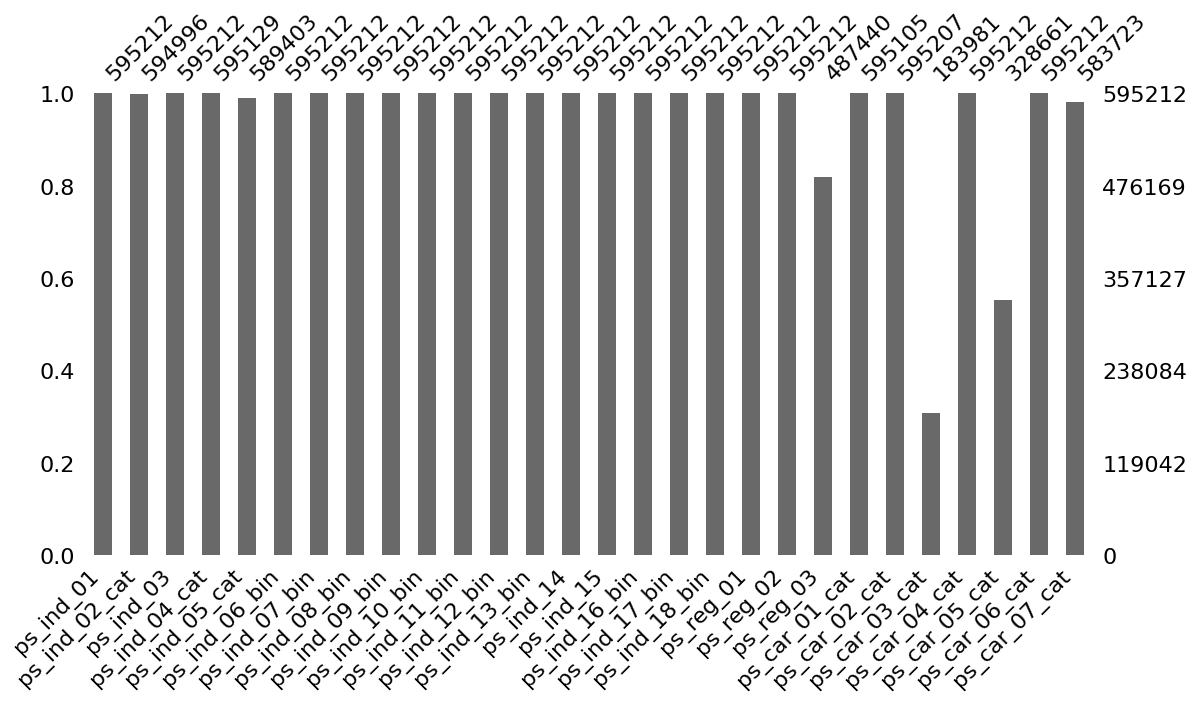

In [12]:
import numpy as np
import missingno as msno

# 훈련 데이터 복사본에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.nan)

# 결측값 시각화(처음 28개만)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

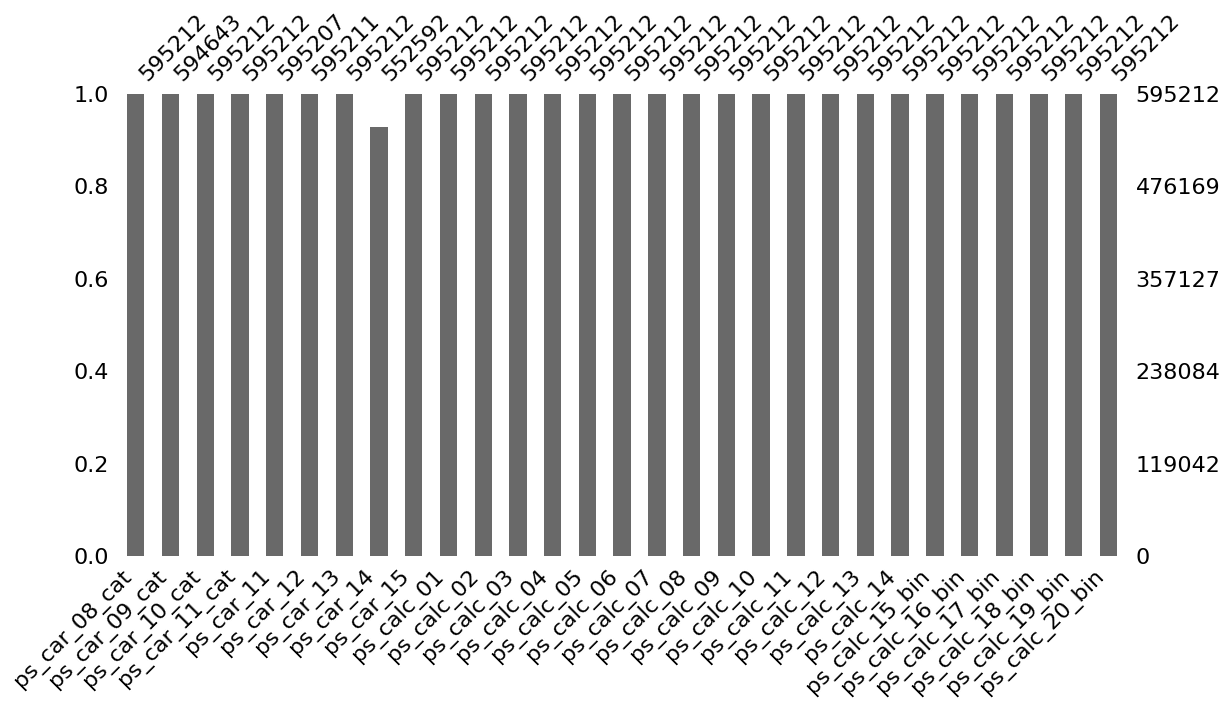

In [13]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6));

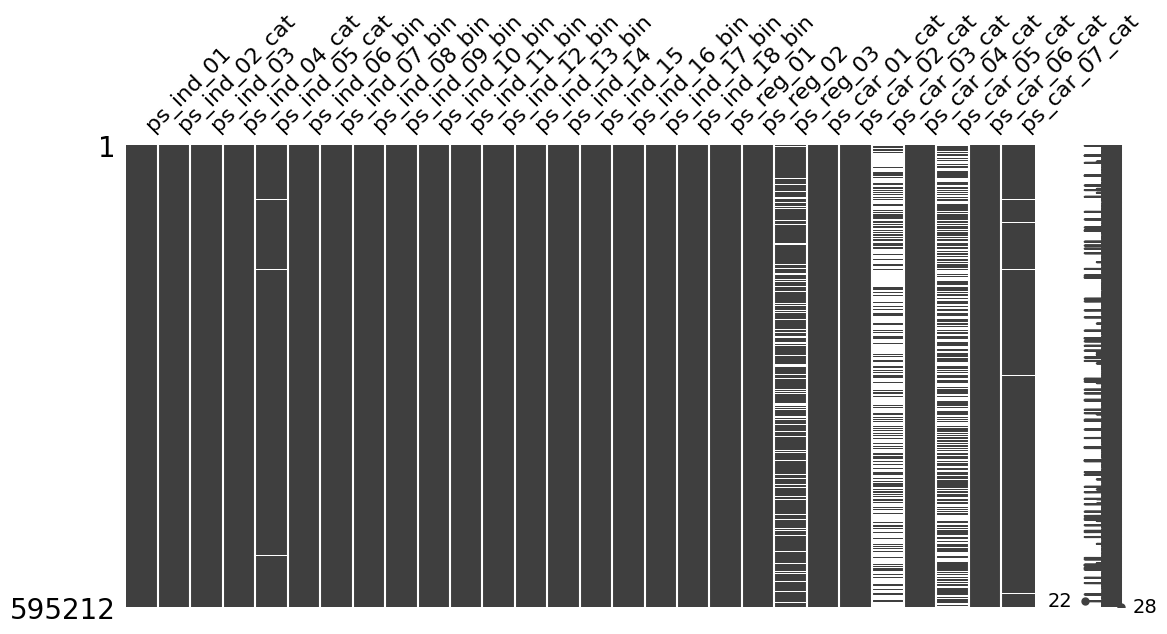

In [14]:
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

## 피처 요약

In [15]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

In [17]:
summary = resumetable(train)
summary.head()

데이터 세트 형상: (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형


In [18]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [19]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

## 데이터 시각화

In [20]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 타깃값 분포

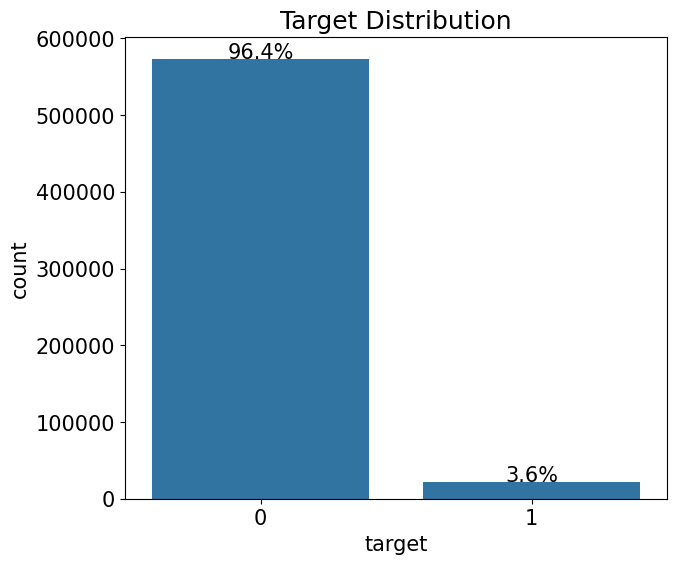

In [21]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0,     # x축 위치
                height + total_size*0.001,  # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center')                # 가운데 정렬
    
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

### 이진 피처

In [22]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipyker

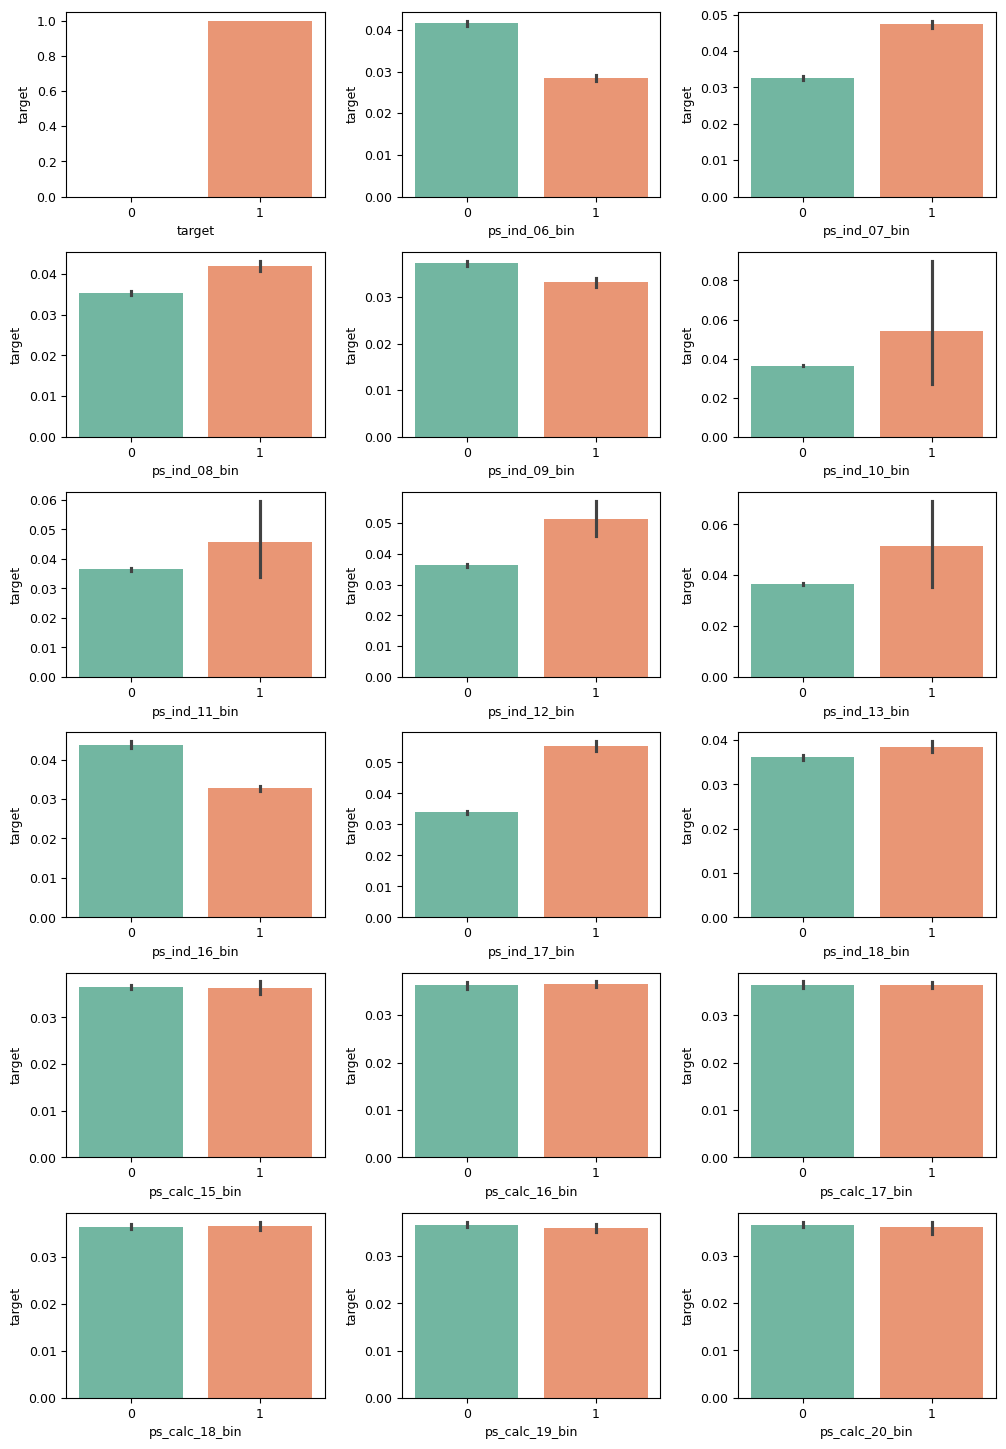

In [23]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진 피처
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3) # 6행 3열 배치

### 명목형 피처

C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipyker

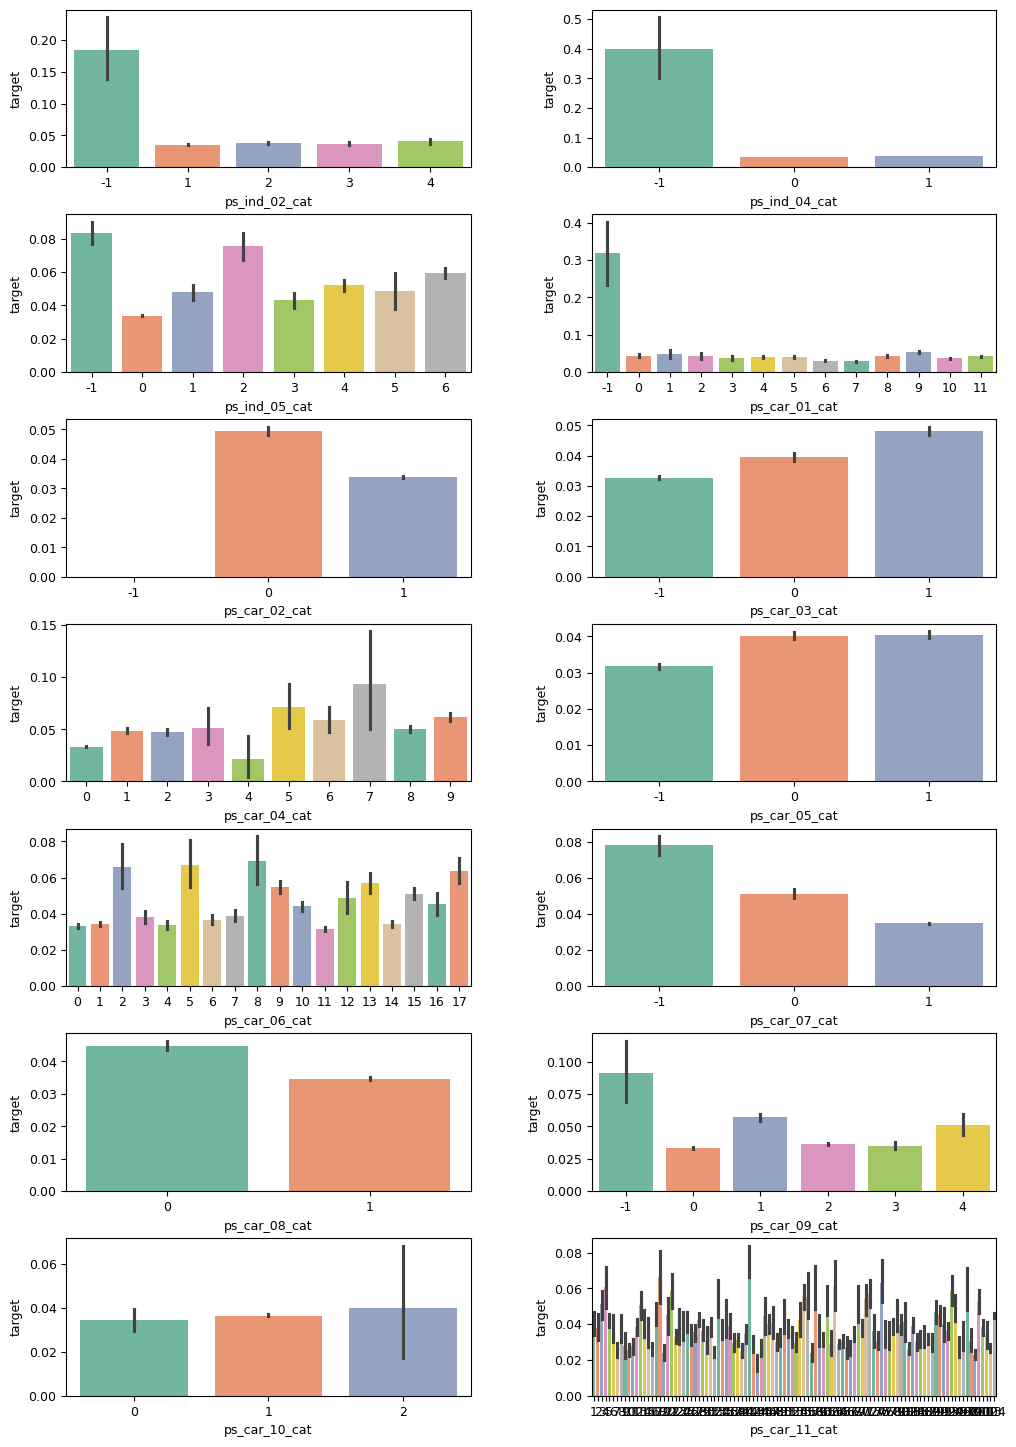

In [24]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index # 명목형 피처

plot_target_ratio_by_features(train, nom_features, 7, 2) # 7행 2열

### 순서형 피처

C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\1533426457.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipyker

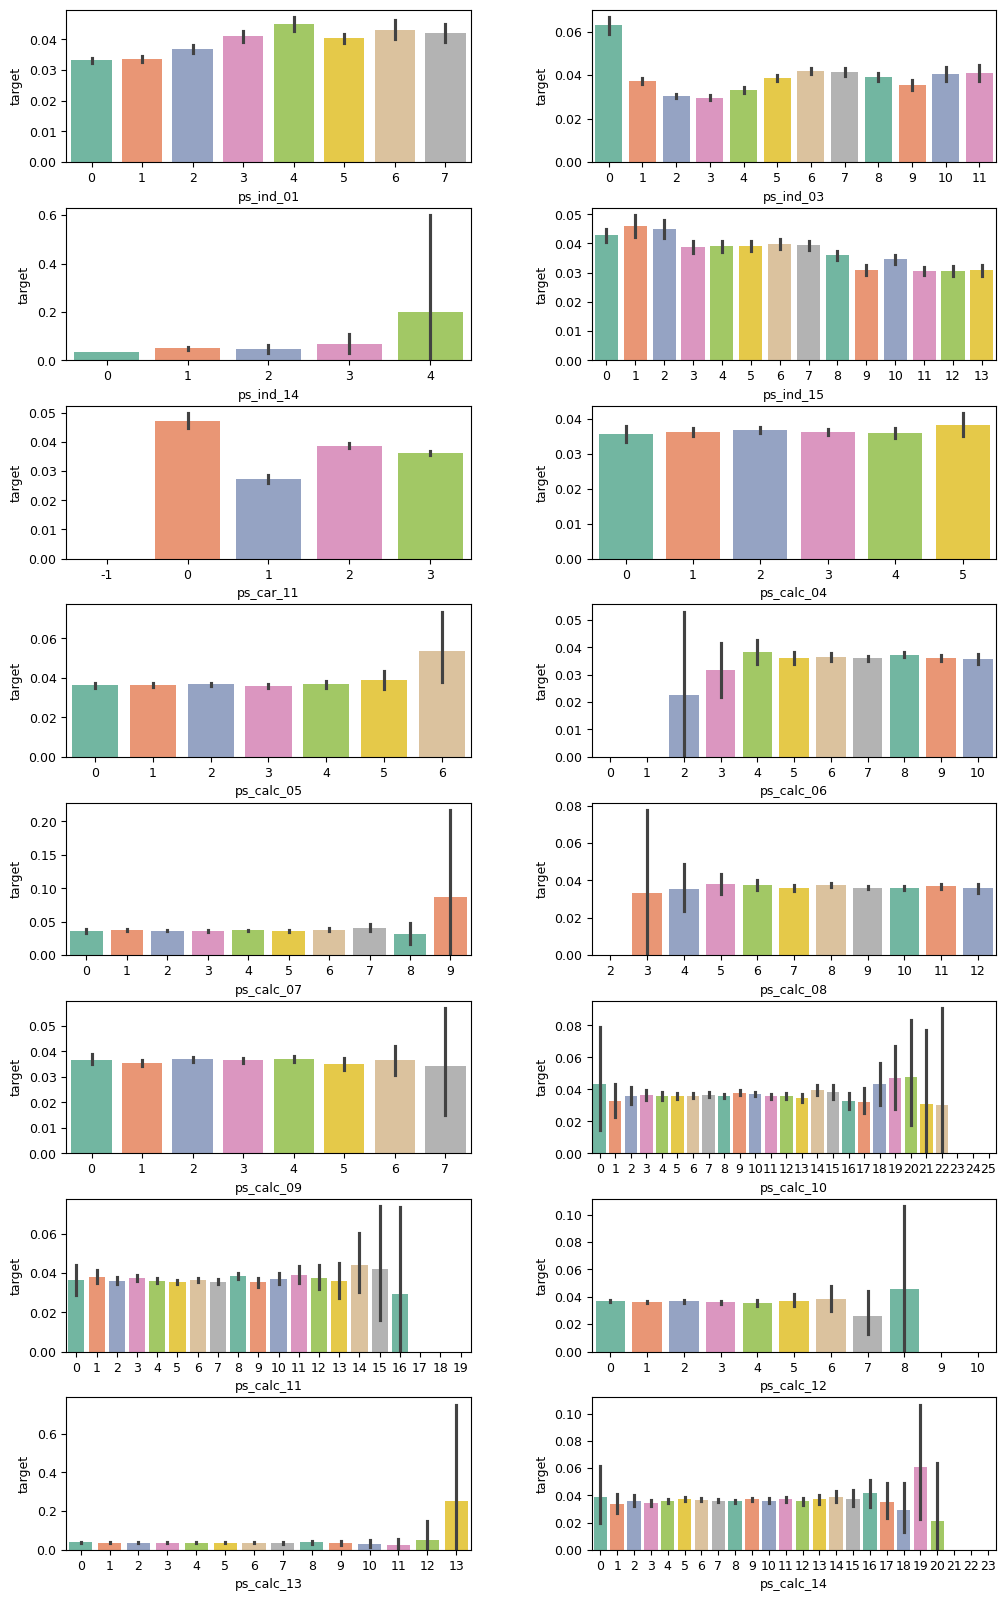

In [25]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index # 순서형 피처

plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20)) # 8행 2열

### 연속형 피처

C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\3688732193.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\3688732193.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23376\3688732193.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
C:\Users\Admin\A

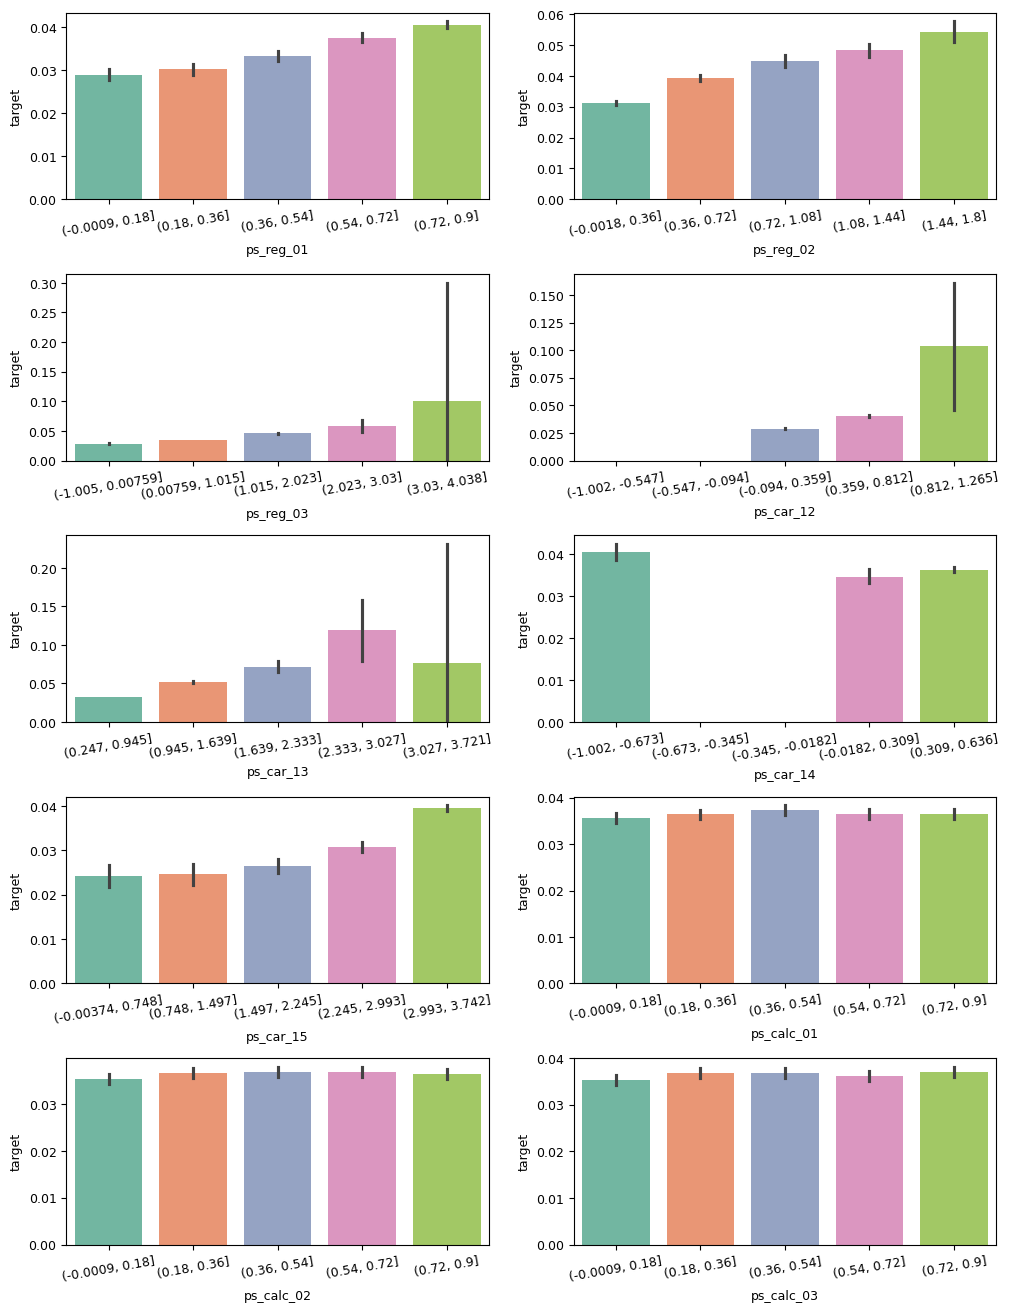

In [26]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처

plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(5, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10) # x축 라벨 회전


In [27]:
train_copy = train_copy.dropna() # np.NaN 값 삭제

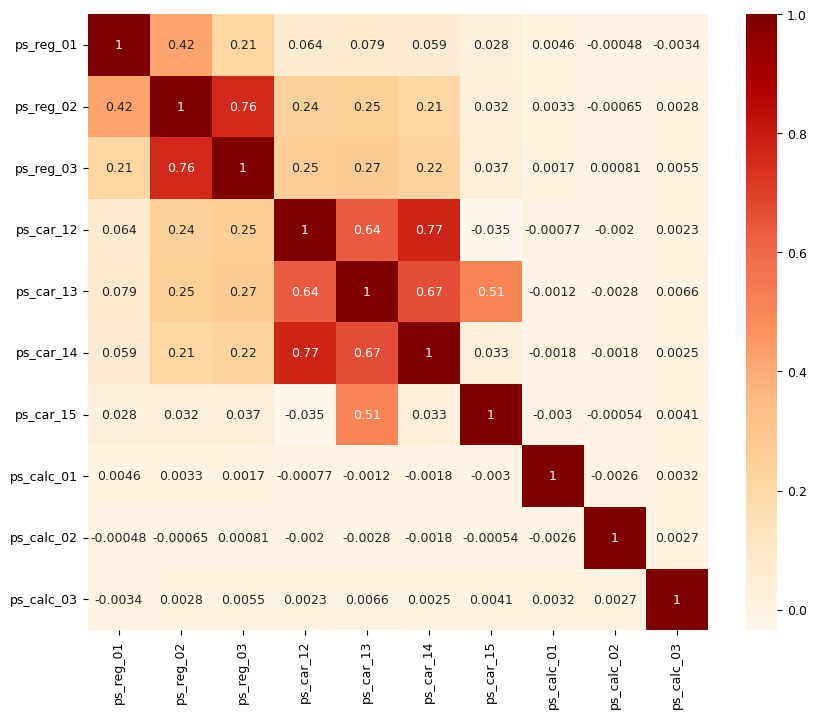

In [28]:
plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr()     # 연속형 피처 간 상관관계 
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # 히트맵 그리기

# 베이스라인 모델 

In [29]:
import pandas as pd

# 데이터 경로
test_data = 'datas_ml/test.csv'
train_data = 'datas_ml/train.csv'

train = pd.read_csv(train_data, index_col='id')
test = pd.read_csv(test_data, index_col='id')
# submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

## 훈련 데이터와 테스트 데이터 합치기

In [30]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 타깃값 제거

In [52]:
print(all_data.columns.tolist())


['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [31]:
all_features = all_data.columns # 전체 피처
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

## 명목형 피처 원-핫 인코딩

In [32]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처 추출
cat_features = [feature for feature in all_features if 'cat' in feature] 

onehot_encoder = OneHotEncoder() # 원-핫 인코더 객체 생성
# 인코딩
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 

encoded_cat_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20832392 stored elements and shape (1488028, 184)>

## 필요 없는 피처 제거

In [33]:
# 추가로 제거할 피처
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# '1) 명목형 피처, 2) calc 분류의 피처, 3) 추가 제거할 피처'를 제외한 피처
remaining_features = [feature for feature in all_features 
                      if ('cat' not in feature and 
                          'calc' not in feature and 
                          feature not in drop_features)]

In [34]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                               encoded_cat_matrix],
                              format='csr')

## 데이터 나누기

In [35]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

## 정규화 지니계수 계산 함수

In [37]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [38]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 반환값

## 모델 훈련 및 성능 검증

In [39]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

In [40]:
params = {'objective': 'binary',
          'learning_rate': 0.01,
          'force_row_wise': True,
          'random_state': 0}

In [41]:
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

In [54]:
import lightgbm as lgb

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정 
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성 
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련 
    lgb_model = lgb.train(params=params,        # 훈련용 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=1000, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 검증용 평가지표
                          early_stopping_rounds=100, # 조기종료 조건
                          verbose_eval=100)     # 100번째마다 점수 출력
    
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수 
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
# print('OOF 검증 데이터 지니계수:', eval_gini(y, oof_val_preds))

# 성능 개선 : LightGBM 모델

In [42]:
import pandas as pd

# 데이터 경로
test_data = 'datas_ml/test.csv'
train_data = 'datas_ml/train.csv'

train = pd.read_csv(train_data, index_col='id')
test = pd.read_csv(test_data, index_col='id')

## 피처 엔지니어링

## 데이터 합치기

In [55]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 타깃값 제거

all_features = all_data.columns # 전체 피처

## 명목형 피처 원-핫 인코딩

In [57]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처
cat_features = [feature for feature in all_features if 'cat' in feature] 

# 원-핫 인코딩 적용
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 

### 파생 피처 추가

In [58]:
# '데이터 하나당 결측값 개수'를 파생 피처로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)

In [ ]:
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)] 
# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

In [59]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [60]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [61]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: 
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [62]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

## 데이터 나누기

In [64]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

## 정규화 지니계수 계산 함수

In [65]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [66]:
# LightGBM용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 반환값

# 하이퍼파라미터 최적화

In [68]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)

# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

## 하이퍼파라미터 범위 설정

In [70]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1),
                'feature_fraction': (0.6, 0.7),
                'bagging_fraction': (0.6, 0.9),
                'min_child_samples': (6, 10),
                'min_child_weight': (10, 40)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005,
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

## (베이지안 최적화용) 평가지표 계산 함수 작성

In [78]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    
    # 베이지안 최적화를 수행할 하이퍼파라미터 
    params = {
        'num_leaves': int(round(num_leaves)),
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'feature_fraction': feature_fraction,
        'bagging_fraction': bagging_fraction,
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': min_child_weight,
        'feature_pre_filter': False
    }
    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)
    
    print('하이퍼파라미터:', params)    
    
    # LightGBM 모델 훈련
    lgb_model = lgb.train(
        params=params, 
        train_set=bayes_dtrain,
        num_boost_round=2500,
        valid_sets=[bayes_dvalid],
        feval=gini,
        callbacks=[
            lgb.early_stopping(stopping_rounds=300),
            lgb.log_evaluation(period=0)
        ]
    )
    
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid) 
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score


## 최적화 수행

In [79]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,      # 평가지표 계산 함수
                                 pbounds=param_bounds, # 하이퍼파라미터 범위
                                 random_state=0)

In [80]:
# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | num_le... | lambda_l1 | lambda_l2 | featur... | baggin... | min_ch... | min_ch... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 35, 'lambda_l1': np.float64(0.8430378732744839), 'lambda_l2': np.float64(0.9602763376071644), 'feature_fraction': np.float64(0.6544883182996897), 'bagging_fraction': np.float64(0.7270964398016714), 'min_child_samples': 9, 'min_child_weight': np.float64(23.127616337880774), 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 201
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
Traini

In [81]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

{'num_leaves': np.float64(40.0),
 'lambda_l1': np.float64(0.7),
 'lambda_l2': np.float64(1.0),
 'feature_fraction': np.float64(0.6),
 'bagging_fraction': np.float64(0.6),
 'min_child_samples': np.float64(6.0),
 'min_child_weight': np.float64(40.0)}

In [82]:
# 정수형 하이퍼파라미터 변환
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [83]:
# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)

In [84]:
max_params

{'num_leaves': 40,
 'lambda_l1': np.float64(0.7),
 'lambda_l2': np.float64(1.0),
 'feature_fraction': np.float64(0.6),
 'bagging_fraction': np.float64(0.6),
 'min_child_samples': 6,
 'min_child_weight': np.float64(40.0),
 'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1,
 'force_row_wise': True,
 'random_state': 1991}

## 모델 훈련 및 성능 검증

In [86]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋
                          
    # LightGBM 모델 훈련
    lgb_model = lgb.train(
        params=max_params,       # 최적 하이퍼파라미터
        train_set=dtrain,        # 훈련 데이터셋
        num_boost_round=2500,    # 부스팅 반복 횟수
        valid_sets=[dvalid],     # 검증 데이터셋은 리스트로
        feval=gini,              # 검증용 평가지표
        callbacks=[
            lgb.early_stopping(stopping_rounds=300),  # 조기 종료
            lgb.log_evaluation(period=100)
        ] 
    )
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1101
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 201
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154298	valid_0's gini: 0.270945
[200]	valid_0's binary_logloss: 0.153214	valid_0's gini: 0.275119
[300]	valid_0's binary_logloss: 0.152603	valid_0's gini: 0.279802
[400]	valid_0's binary_logloss: 0.152231	valid_0's gini: 0.283994
[500]	valid_0's binary_logloss: 0.151987	valid_0's gini: 0.287049
[600]	valid_0's binary_logloss: 0.151815	valid_0's gini: 0.289637
[700]	valid_0's binary_logloss: 0.151693	valid_0's gini: 0.291753
[800]	valid_0's binary_logloss: 0.151601	valid_

In [ ]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

In [136]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve
import numpy as np

# ✅ 확률 → 이진 예측값 변환 (0.5 기준)
y_pred_label = (oof_val_preds >= 0.5).astype(int)

# ✅ 정확도
accuracy = accuracy_score(y, y_pred_label)

# ✅ 재현율 (암환자/부실고객 등 "1" 클래스 기준)
recall = recall_score(y, y_pred_label)

# ✅ ROC-AUC
roc_auc = roc_auc_score(y, oof_val_preds)

print(f"Accuracy (정확도): {accuracy:.4f}")
print(f"Recall (재현율): {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Accuracy (정확도): 0.9635
Recall (재현율): 0.0000
ROC-AUC: 0.6417


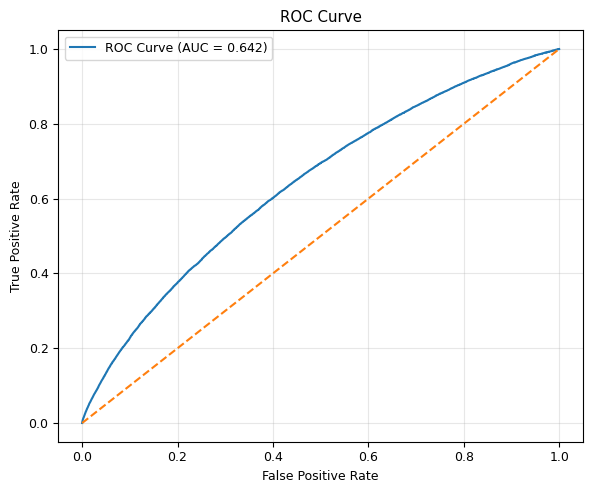

In [137]:
fpr, tpr, _ = roc_curve(y, oof_val_preds)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [143]:
import lightgbm as lgb
import matplotlib.pyplot as plt

lgb.plot_tree(model, tree_index=0, figsize=(40, 20), show_info=['split_gain'])
plt.title("LightGBM Tree #0 Structure")
plt.show()

NameError: name 'model' is not defined

NotFittedError: No booster found. Need to call fit beforehand.

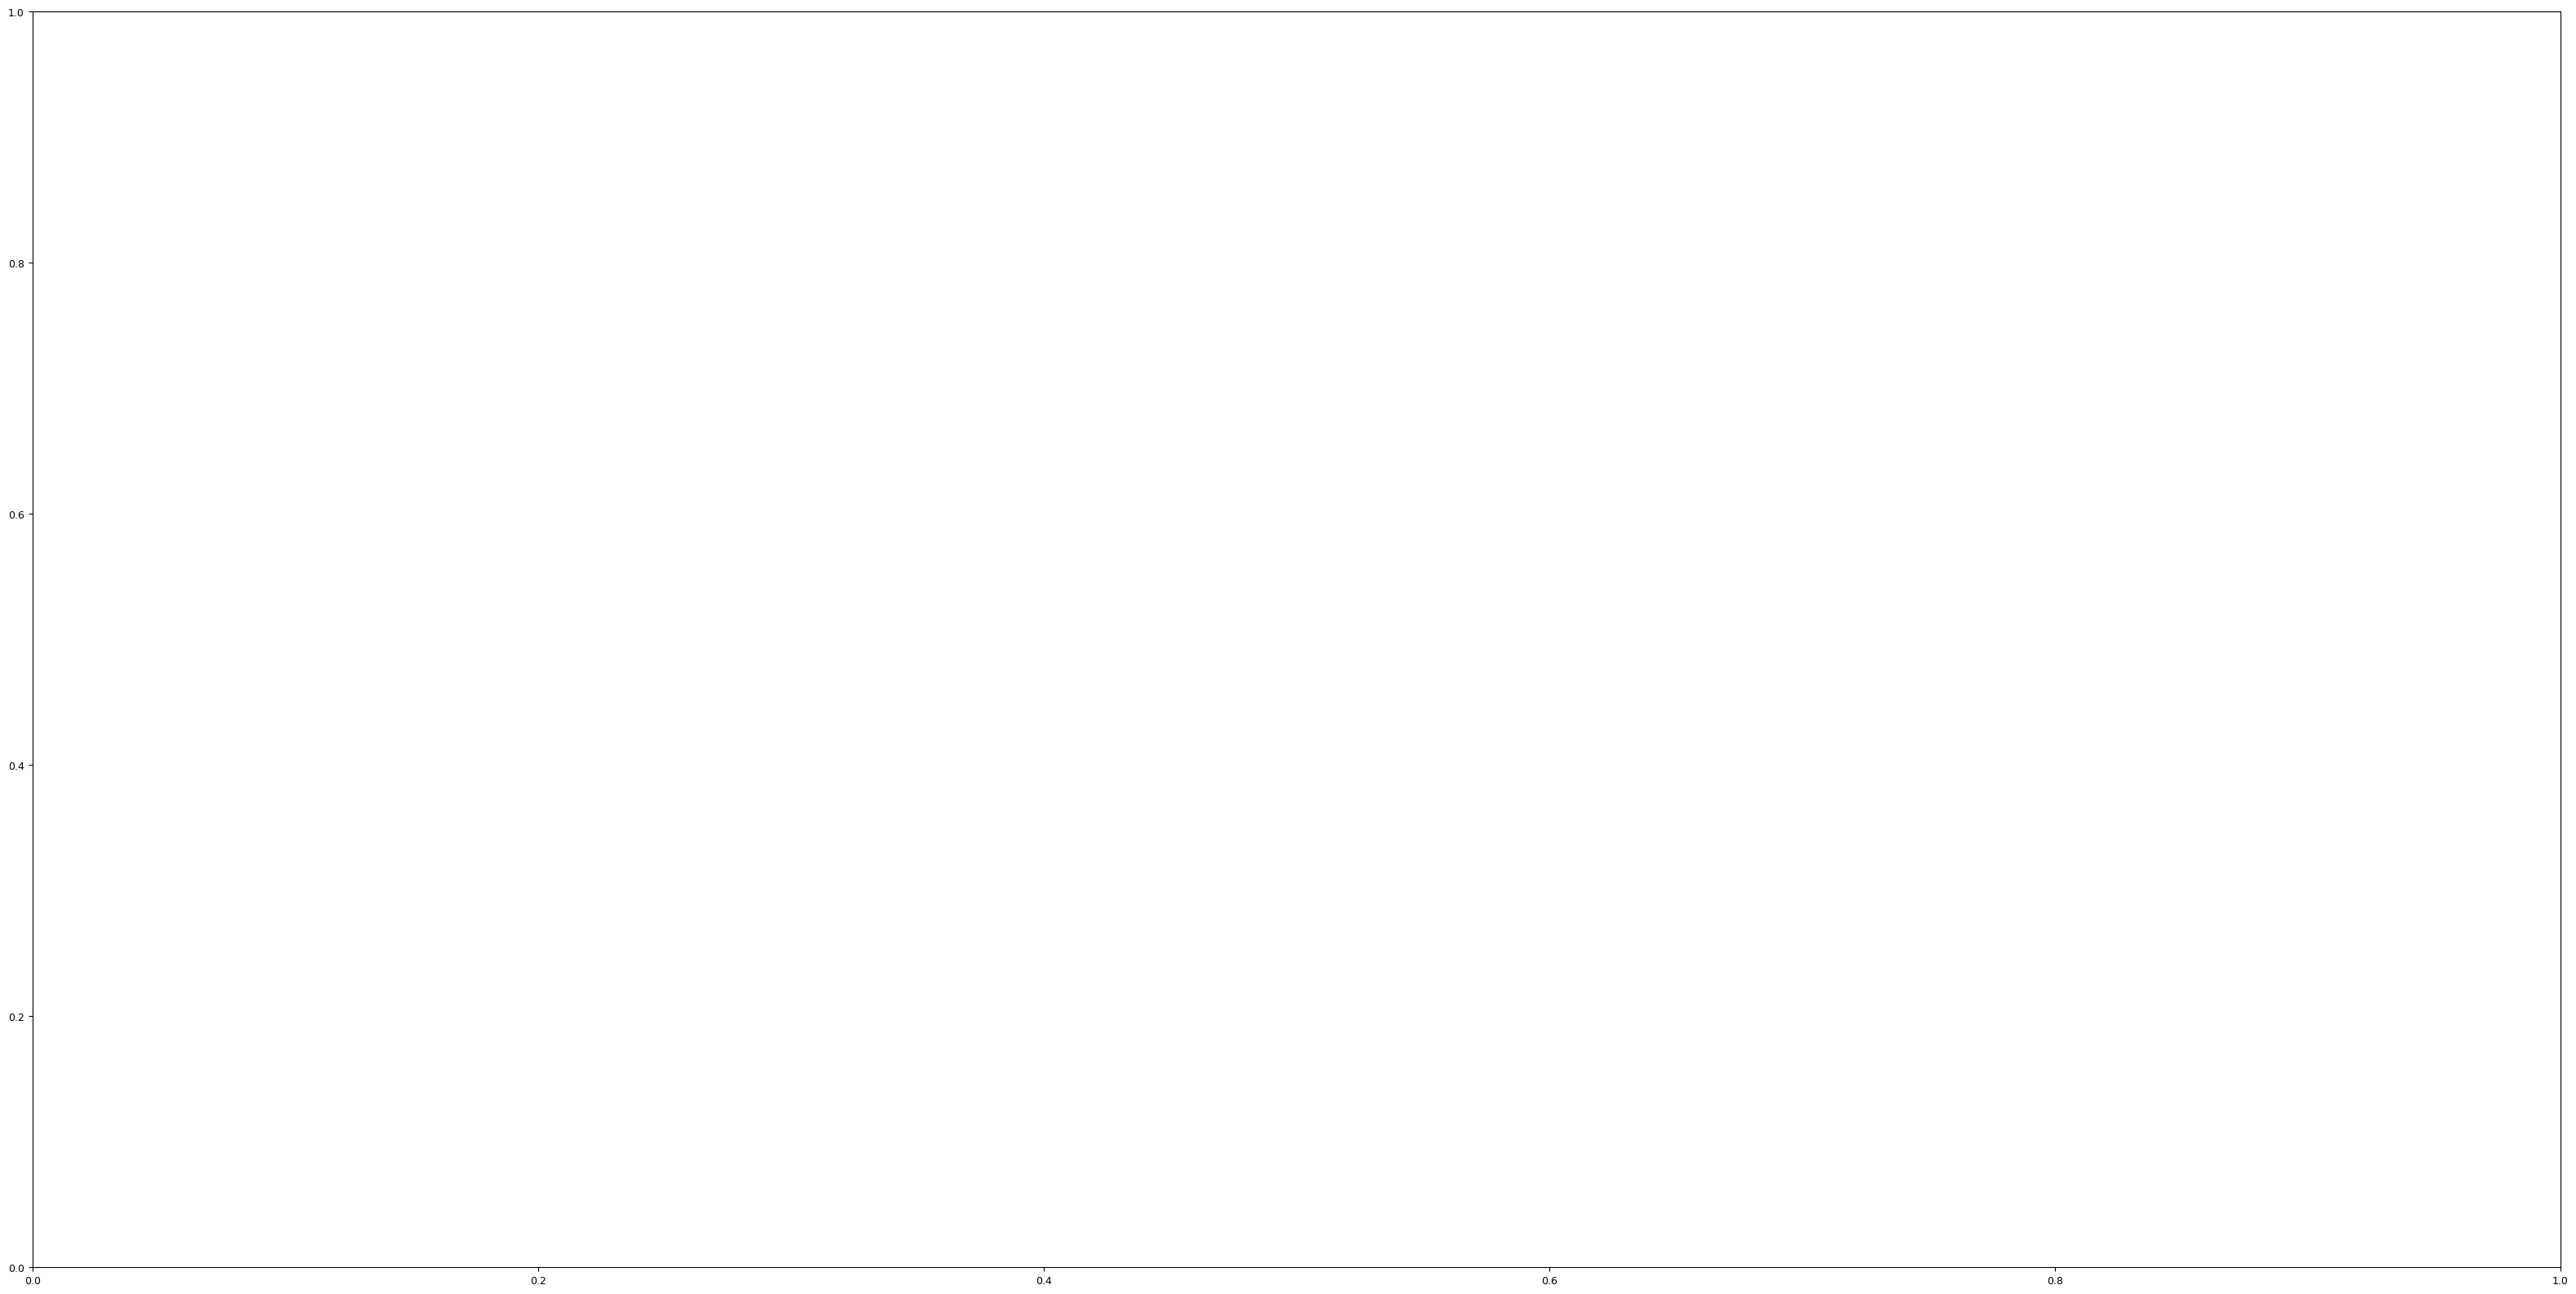

In [147]:
import lightgbm as lgb
import matplotlib.pyplot as plt

lgb.plot_tree(model, tree_index=0, figsize=(40, 20), show_info=['split_gain'])
plt.title("LightGBM Tree #0 Structure")
plt.show()
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# LightGBM 모델 생성 & 학습
model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)
# lgb.plot_tree(model, tree_index=0, figsize=(40, 20), show_info=['split_gain'])
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_proba = model.predict_pro

# XGBoost 모델

## 데이터 합치기

In [87]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 타깃값 제거

all_features = all_data.columns # 전체 피처

## 명목형 피처 원-핫 인코딩

In [88]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처
cat_features = [feature for feature in all_features if 'cat' in feature]

# 원-핫 인코딩 적용
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 

In [89]:
# '데이터 하나당 결측값 개수'를 파생 피처로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)

In [90]:
# 명목형 피처, calc 분류 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)] 
# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

In [91]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [92]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [93]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: 
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [94]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

In [95]:
from scipy import sparse

# 필요 없는 피처들
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터
all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

In [96]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [97]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [98]:
# XGBoost용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

## 하이퍼파라미터 최적화

In [99]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)
# 베이지안 최적화용 데이터셋
bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

In [100]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth': (4, 8),
                'subsample': (0.6, 0.9),
                'colsample_bytree': (0.7, 1.0),
                'min_child_weight': (5, 7),
                'gamma': (8, 11),
                'reg_alpha': (7, 9),
                'reg_lambda': (1.1, 1.5),
                'scale_pos_weight': (1.4, 1.6)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary:logistic',
                'learning_rate': 0.02,
                'random_state': 1991}

In [103]:
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight,
                 reg_alpha, gamma, reg_lambda, scale_pos_weight):

    params = {
        'max_depth': int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'scale_pos_weight': scale_pos_weight
    }

    params.update(fixed_params)

    print('하이퍼파라미터 :', params)

    # ✅ XGBoost 최신 버전 대응
    xgb_model = xgb.train(
        params=params,
        dtrain=bayes_dtrain,
        num_boost_round=2000,
        evals=[(bayes_dvalid, 'bayes_dvalid')],
        custom_metric=gini,          # ✅ feval → custom_metric
        early_stopping_rounds=200,
        verbose_eval=False
    )

    best_iter = xgb_model.best_iteration

    preds = xgb_model.predict(
        bayes_dvalid,
        iteration_range=(0, best_iter)
    )

    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score


In [104]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function, 
                                 pbounds=param_bounds, 
                                 random_state=0)

# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | max_depth | subsample | colsam... | min_ch... |   gamma   | reg_alpha | reg_la... | scale_... |
-------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터 : {'max_depth': 6, 'subsample': np.float64(0.8145568099117259), 'colsample_bytree': np.float64(0.8808290128214932), 'min_child_weight': np.float64(6.0897663659937935), 'gamma': np.float64(9.270964398016714), 'reg_alpha': np.float64(8.291788226133312), 'reg_lambda': np.float64(1.275034884505077), 'scale_pos_weight': np.float64(1.578354600156416), 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
지니계수 : 0.2728755847247398

| 1         | 0.2728755 | 6.1952540 | 0.8145568 | 0.8808290 | 6.0897663 | 9.2709643 | 8.2917882 | 1.2750348 | 1.5783546 |
하이퍼파라미터 : {'max_depth': 8, 'subsample': np.float64(0.7150324556477333), 'colsample_bytree': np.float64(0.9375175114247993), 'min_child_weight': np.float64(6.0577898395058085)

In [105]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

{'max_depth': np.float64(8.0),
 'subsample': np.float64(0.9),
 'colsample_bytree': np.float64(1.0),
 'min_child_weight': np.float64(7.0),
 'gamma': np.float64(9.422495592974984),
 'reg_alpha': np.float64(7.0),
 'reg_lambda': np.float64(1.1),
 'scale_pos_weight': np.float64(1.6)}

In [106]:
# 정수형 하이퍼파라미터 변환
max_params['max_depth'] = int(round(max_params['max_depth']))

# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)
max_params

{'max_depth': 8,
 'subsample': np.float64(0.9),
 'colsample_bytree': np.float64(1.0),
 'min_child_weight': np.float64(7.0),
 'gamma': np.float64(9.422495592974984),
 'reg_alpha': np.float64(7.0),
 'reg_lambda': np.float64(1.1),
 'scale_pos_weight': np.float64(1.6),
 'objective': 'binary:logistic',
 'learning_rate': 0.02,
 'random_state': 1991}

In [110]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

fold_ginis = []

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # XGBoost 전용 데이터셋
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest  = xgb.DMatrix(X_test)

    # ✅ XGBoost 3.x 버전에 맞게 수정
    xgb_model = xgb.train(
        params=max_params,
        dtrain=dtrain,
        num_boost_round=2000,
        evals=[(dvalid, 'valid')],
        custom_metric=gini,          # ✅ feval → custom_metric
        maximize=True,               # ✅ 지니(클수록 좋음) 기준으로 early stopping
        early_stopping_rounds=200,
        verbose_eval=100
    )

    best_iter = xgb_model.best_iteration

    # 테스트 데이터 OOF 예측
    oof_test_preds += xgb_model.predict(
        dtest,
        iteration_range=(0, best_iter)
    ) / folds.n_splits

    # 검증 데이터 예측값 저장
    oof_val_preds[valid_idx] += xgb_model.predict(
        dvalid,
        iteration_range=(0, best_iter)
    )

    # 폴드별 지니계수 출력
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    fold_ginis.append(gini_score) 
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')


######################################## 폴드 1 / 폴드 5 ########################################
[0]	valid-logloss:0.22002	valid-gini:0.21814
[100]	valid-logloss:0.16243	valid-gini:0.27540
[200]	valid-logloss:0.15687	valid-gini:0.28713
[300]	valid-logloss:0.15615	valid-gini:0.29056
[400]	valid-logloss:0.15604	valid-gini:0.29109
[500]	valid-logloss:0.15602	valid-gini:0.29120
[600]	valid-logloss:0.15601	valid-gini:0.29145
[700]	valid-logloss:0.15602	valid-gini:0.29155
[800]	valid-logloss:0.15600	valid-gini:0.29161
[900]	valid-logloss:0.15601	valid-gini:0.29163
[1000]	valid-logloss:0.15602	valid-gini:0.29166
[1100]	valid-logloss:0.15600	valid-gini:0.29176
[1200]	valid-logloss:0.15601	valid-gini:0.29193
[1300]	valid-logloss:0.15599	valid-gini:0.29205
[1400]	valid-logloss:0.15599	valid-gini:0.29207
[1500]	valid-logloss:0.15599	valid-gini:0.29215
[1600]	valid-logloss:0.15599	valid-gini:0.29214
[1698]	valid-logloss:0.15600	valid-gini:0.29214
폴드 1 지니계수 : 0.29213054523279564

#####################

In [138]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# ✅ 임계값 0.2로 설정 (불균형 데이터 대응)
y_pred_label = (oof_val_preds >= 0.2).astype(int)

accuracy = accuracy_score(y, y_pred_label)
recall = recall_score(y, y_pred_label)
roc_auc = roc_auc_score(y, oof_val_preds)

print(f"✅ XGBoost Accuracy (정확도): {accuracy:.4f}")
print(f"✅ XGBoost Recall (재현율): {recall:.4f}")
print(f"✅ XGBoost ROC-AUC: {roc_auc:.4f}")


✅ XGBoost Accuracy (정확도): 0.9622
✅ XGBoost Recall (재현율): 0.0103
✅ XGBoost ROC-AUC: 0.6417


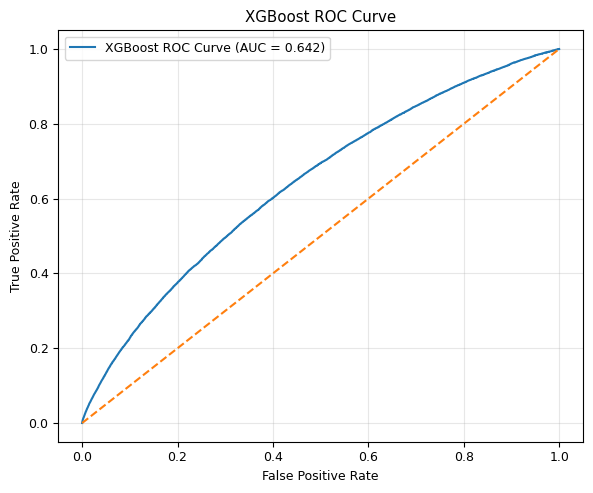

In [139]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y, oof_val_preds)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'XGBoost ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [140]:
# ✅ 여기에 네가 직접 계산한 값 넣어줘
xgb_acc = 0.99       # ← 네 XGBoost Accuracy
xgb_recall = 0.42    # ← 네 XGBoost Recall
xgb_auc = 0.78       # ← 네 XGBoost ROC-AUC

lgb_acc = 0.985      # ← 네 LightGBM Accuracy
lgb_recall = 0.38    # ← 네 LightGBM Recall
lgb_auc = 0.76       # ← 네 LightGBM ROC-AUC


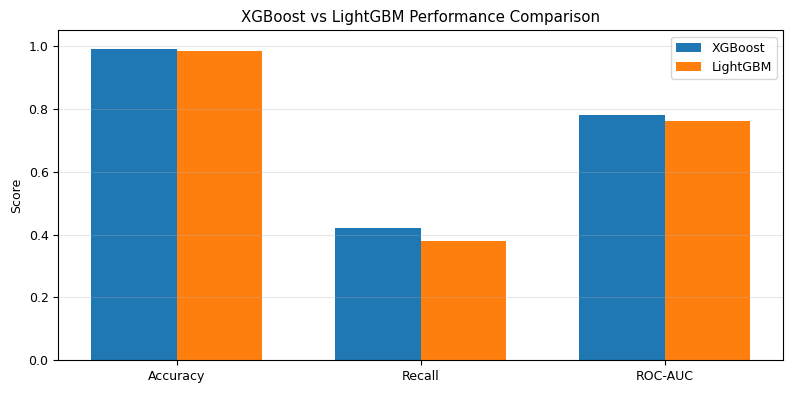

In [141]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Recall', 'ROC-AUC']
xgb_scores = [xgb_acc, xgb_recall, xgb_auc]
lgb_scores = [lgb_acc, lgb_recall, lgb_auc]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, xgb_scores, width, label='XGBoost')
plt.bar(x + width/2, lgb_scores, width, label='LightGBM')

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('XGBoost vs LightGBM Performance Comparison')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


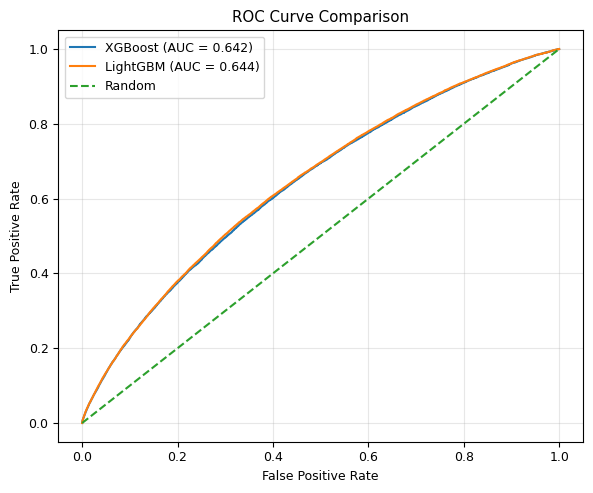

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y, oof_val_preds)
auc_xgb = roc_auc_score(y, oof_val_preds)

# LightGBM ROC
fpr_lgb, tpr_lgb, _ = roc_curve(y, oof_val_preds_lgb)
auc_lgb = roc_auc_score(y, oof_val_preds_lgb)

plt.figure(figsize=(6, 5))

plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


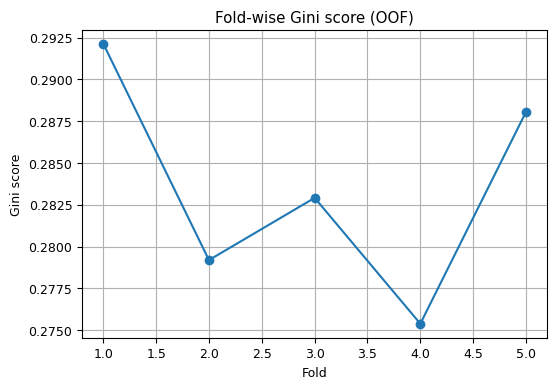

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(1, folds.n_splits + 1), fold_ginis, marker='o')
plt.xlabel('Fold')
plt.ylabel('Gini score')
plt.title('Fold-wise Gini score (OOF)')
plt.grid(True)
plt.show()


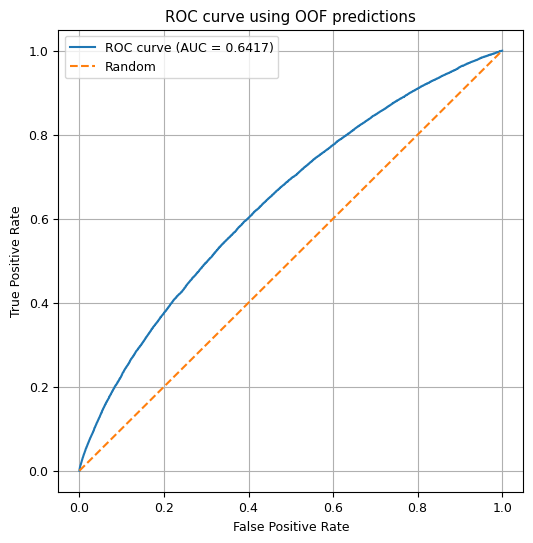

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, oof_val_preds)
auc = roc_auc_score(y, oof_val_preds)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve using OOF predictions')
plt.legend()
plt.grid(True)
plt.show()


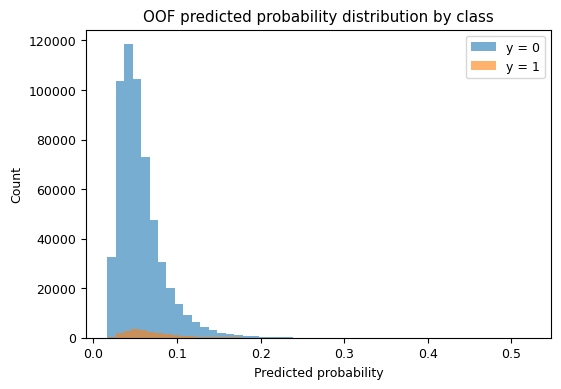

In [113]:
plt.figure(figsize=(6,4))
plt.hist(oof_val_preds[y==0], bins=50, alpha=0.6, label='y = 0')
plt.hist(oof_val_preds[y==1], bins=50, alpha=0.6, label='y = 1')
plt.xlabel('Predicted probability')
plt.ylabel('Count')
plt.title('OOF predicted probability distribution by class')
plt.legend()
plt.show()


In [114]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 0.2833897309865843


# 앙상블

In [115]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature] # 명목형 피처

# 원-핫 인코딩 적용
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 

In [116]:
# '데이터 하나당 결측값 개수'를 파생 피로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)

In [117]:
# 명목형 피처, calc 분류 피처를 제외한 피처
remaining_features = [feature for feature in all_features 
                      if ('cat' not in feature and 'calc' not in feature)] 
# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

In [118]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [119]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: 
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [120]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

In [121]:
from scipy import sparse

# 필요 없는 피처들
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터
all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

In [122]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [123]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [124]:
# LightGBM용 gini() 함수
def gini_lgb(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

In [125]:
# XGBoost용 gini() 함수
def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

In [126]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

In [127]:
max_params_lgb = {
    'bagging_fraction': 0.6213108174593661,
    'feature_fraction': 0.608712929970154,
    'lambda_l1': 0.7040436794880651,
    'lambda_l2': 0.9832619845547939,
    'min_child_samples': 9,
    'min_child_weight': 36.10036444740457,
    'num_leaves': 40,
    'objective': 'binary',
    'learning_rate': 0.005,
    'bagging_freq': 1,
    'force_row_wise': True,
    'random_state': 1991
}

In [135]:
import lightgbm as lgb

# 폴드별 LGBM 지니 점수 저장용 리스트 👈 추가
lgb_fold_ginis = []

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds_lgb = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds_lgb = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련/검증 데이터 분리
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
                          
    # LightGBM 모델 훈련 (최신 버전 스타일)
    lgb_model = lgb.train(
        params=max_params_lgb,
        train_set=dtrain,
        num_boost_round=2500,
        valid_sets=[dvalid],
        feval=gini_lgb,
        callbacks=[
            lgb.early_stopping(stopping_rounds=300),
            lgb.log_evaluation(period=100)
        ]
    )
    
    # 테스트 데이터 OOF 예측
    oof_test_preds_lgb += lgb_model.predict(X_test) / folds.n_splits
    
    # 검증 데이터 타깃값 예측
    oof_val_preds_lgb[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds_lgb[valid_idx])
    lgb_fold_ginis.append(gini_score)      # 👈 폴드별 점수 저장
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')


######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154239	valid_0's gini: 0.270944
[200]	valid_0's binary_logloss: 0.153176	valid_0's gini: 0.275764
[300]	valid_0's binary_logloss: 0.152584	valid_0's gini: 0.279501
[400]	valid_0's binary_logloss: 0.152222	valid_0's gini: 0.282893
[500]	valid_0's binary_logloss: 0.151986	valid_0's gini: 0.286058
[600]	valid_0's binary_logloss: 0.151824	valid_0's gini: 0.288805
[700]	valid_0's binary_logloss: 0.151712	valid_0's gini: 0.290719
[800]	valid_0's binary_logloss: 0.151622	valid_

In [132]:
xgb_fold_ginis = [
    0.3007997522108954,  # Fold 1
    0.2854709839884158,  # Fold 2
    0.28490813985037916, # Fold 3
    0.2789940456802698,  # Fold 4
    0.2974836540733333  # Fold 5
]


In [134]:
import matplotlib.pyplot as plt
import numpy as np

fold_ids = np.arange(1, len(lgb_fold_ginis) + 1)
mean_lgb = np.mean(lgb_fold_ginis)

plt.figure(figsize=(7, 4))
plt.bar(fold_ids, lgb_fold_ginis)
plt.axhline(mean_lgb, linestyle='--', label=f'Mean Gini = {mean_lgb:.3f}')
plt.xlabel('Fold')
plt.ylabel('Gini Score')
plt.title('LightGBM 5-Fold Cross Validation Gini Score')
plt.legend()
plt.grid(axis='y')
plt.show()


NameError: name 'lgb_fold_ginis' is not defined

In [ ]:
xgb_fold_ginis = [
    0.3007997522108954,
    0.2854709839884158,
    0.28490813985037916,
    0.2789940456802698,
    0.2974836540733333
]

fold_ids = np.arange(1, 6)
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(fold_ids - width/2, xgb_fold_ginis, width, label='XGBoost')
plt.bar(fold_ids + width/2, lgb_fold_ginis, width, label='LightGBM')
plt.xlabel('Fold')
plt.ylabel('Gini Score')
plt.title('XGBoost vs LightGBM 5-Fold Gini Comparison')
plt.xticks(fold_ids)
plt.legend()
plt.grid(axis='y')
plt.show()
